In [1]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Functions of tables

In [3]:
# https://www.bls.gov/news.release/atus.t01.htm#tus_tu_nr1.f.1
time_use = Table.read_table("time_use.csv")
time_use.show()

Activity,Gender,Type,Average hours per day,Average percent engaged in the activity,Average hours per day for persons who engaged in the activity
"Total, all activities",Male,Total,24,100,24
Personal care activities,Male,Subtotal,9.58,100,9.58
Sleeping,Male,Category,8.79,99.9,8.8
Eating and drinking,Male,Category,1.17,94.7,1.24
Household activities,Male,Subtotal,1.82,77.4,2.36
Housework,Male,Category,0.57,35.8,1.6
Food preparation and cleanup,Male,Category,0.59,57.8,1.02
Lawn and garden care,Male,Category,0.19,10.3,1.85
Household management,Male,Category,0.14,19.4,0.72
Purchasing goods and services,Male,Subtotal,0.76,44.6,1.71


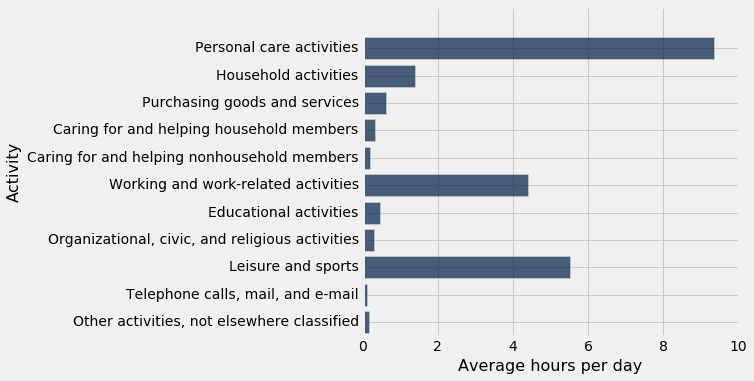

In [42]:
sum(time_use.where("Gender", are.equal_to("Male")).where("Type", are.equal_to("Subtotal")).column(3))
time_use.where("Gender", are.equal_to("Female")).where("Type", are.equal_to("Subtotal")).barh("Activity", "Average hours per day")

In [73]:
def with_percents(tbl, column_for_counts):
    percents = 100 * tbl.column(column_for_counts) / sum(tbl.column(column_for_counts))
    percent_label = "Percent of " + column_for_counts
    return tbl.with_columns(percent_label, percents)

def barh_percents(tbl, column_for_labels, column_for_counts):
    with_percents(tbl, column_for_counts).barh(column_for_labels, "Percent of " + column_for_counts)

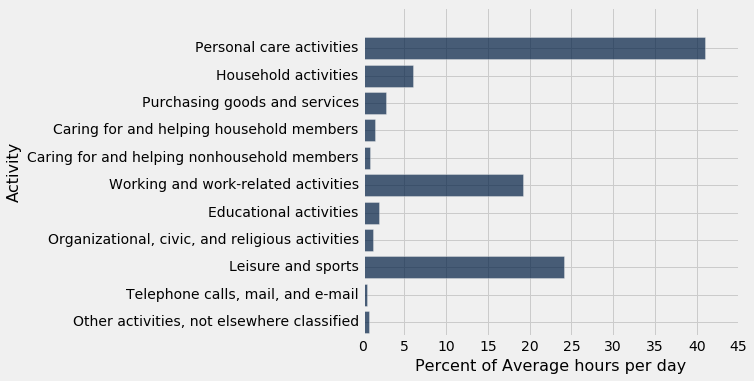

In [75]:
female_subtotals = time_use.where("Type", are.equal_to("Subtotal")).where("Gender", are.equal_to("Female"))
barh_percents(female_subtotals, "Activity", "Average hours per day")

## Applying functions to columns

In [23]:
words = Table.read_table("words.csv")#, encoding='iso8859')
words

Proto Indo-European,English
abelos,apple
abhnos,sudden
abhro-,very
acnos,lamb
ad,at
adejo,prepare
adgho,beset
admi,dry
admṇ,rite
ados,spelt


In [13]:
# https://en.wikipedia.org/wiki/Grimm%27s_law
def consonant_shift(text):
    # Just a few ways in which consonants shifted from Proto-Indo-European
    # to early Germanic (which then came into English).
    # Examples:  Pater -> Father, Pod -> Foot, Tres -> Three, Decem -> Ten, Qod -> What
    return text.replace("t", "th").replace("p", "f").replace("d", "t").replace("qo", "who")

In [25]:
with_shift = words.with_columns("Consonant-shifted", words.apply(consonant_shift, "Proto Indo-European"))

In [26]:
with_shift.where("Proto Indo-European", are.containing("pat"))

Proto Indo-European,English,Consonant-shifted
patejo,lie-open,fathejo
pater,father,father
patera,saucer,fathera
patjai,suffer,fathjai
patrja,fatherland,fathrja
patrjos,fatherly,fathrjos
patrujos,uncle,fathrujos
sṃopator,sibling,sṃofathor


In [28]:
# Note the shift sometimes (often) doesn't match:
#   In qatwrpods, t -> d happened, not t -> th
with_shift.where("Proto Indo-European", are.containing("pod"))

Proto Indo-European,English,Consonant-shifted
dwipods,biped,twifots
lapods,stone,lafots
podjom,relief,fotjom
pods,foot,fots
qatwṛpods,quadruped,qathwṛfots


In [27]:
with_shift.where("Proto Indo-European", are.equal_to("ad"))

Proto Indo-European,English,Consonant-shifted
ad,at,at


## `group`

In [29]:
crime = Table.read_table("us_crime.csv")
crime

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
Alabama,1960,3266740,6097,406,281,nan,898,4512,33823,11626,19344,2853
Alabama,1961,3302000,5564,427,252,nan,630,4255,32541,11205,18801,2535
Alabama,1962,3358000,5283,316,218,nan,754,3995,35829,11722,21306,2801
Alabama,1963,3347000,6115,340,192,nan,828,4755,38521,12614,22874,3033
Alabama,1964,3407000,7260,316,397,nan,992,5555,46290,15898,26713,3679
Alabama,1965,3462000,6916,395,367,nan,992,5162,48215,16398,28115,3702
Alabama,1966,3517000,8098,384,341,nan,1124,6249,53740,18551,30583,4606
Alabama,1967,3540000,8448,415,371,nan,1167,6495,57079,20227,31682,5170
Alabama,1968,3566000,8288,421,396,nan,1462,6009,62997,22403,34508,6086
Alabama,1969,3531000,8842,485,494,nan,1448,6415,66248,23559,36644,6045


In [34]:
crime.sort("Population", descending=True)

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
United States-Total,2014,318857056,1197987,14249,84041,116645,325802,741291,8277829,1729806,5858496,689527
United States-Total,2013,316497531,1199684,14319,82109,113695,345095,726575,8650761,1931835,6018632,700294
United States-Total,2012,313873685,1217067,14866,85141,nan,355051,762009,9001992,2109932,6168874,723186
United States-Total,2011,311587816,1206031,14661,84175,nan,354772,752423,9052743,2185140,6151095,716508
United States-Total,2010,309330219,1251248,14722,85593,nan,369089,781844,9112625,2168459,6204601,739565
United States-Total,2009,307006550,1325896,15399,89241,nan,408742,812514,9337060,2203313,6338095,795652
United States-Total,2008,304059724,1394461,16465,90750,nan,443563,843683,9774152,2228887,6586206,959059
United States-Total,2007,301621157,1422970,17128,92160,nan,447324,866358,9882212,2190198,6591542,1100472
United States-Total,2006,299398484,1435123,17309,94472,nan,449246,874096,10019601,2194993,6626363,1198245
United States-Total,2005,296507061,1390745,16740,94347,nan,417438,862220,10174754,2155448,6783447,1235859


In [37]:
states = crime.where("State", are.not_equal_to("United States-Total"))
states

State,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Revised rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft
Alabama,1960,3266740,6097,406,281,nan,898,4512,33823,11626,19344,2853
Alabama,1961,3302000,5564,427,252,nan,630,4255,32541,11205,18801,2535
Alabama,1962,3358000,5283,316,218,nan,754,3995,35829,11722,21306,2801
Alabama,1963,3347000,6115,340,192,nan,828,4755,38521,12614,22874,3033
Alabama,1964,3407000,7260,316,397,nan,992,5555,46290,15898,26713,3679
Alabama,1965,3462000,6916,395,367,nan,992,5162,48215,16398,28115,3702
Alabama,1966,3517000,8098,384,341,nan,1124,6249,53740,18551,30583,4606
Alabama,1967,3540000,8448,415,371,nan,1167,6495,57079,20227,31682,5170
Alabama,1968,3566000,8288,421,396,nan,1462,6009,62997,22403,34508,6086
Alabama,1969,3531000,8842,485,494,nan,1448,6415,66248,23559,36644,6045


In [44]:
states.group("Year")

Year,count
1960,50
1961,50
1962,50
1963,50
1964,50
1965,51
1966,51
1967,51
1968,51
1969,51


In [38]:
states.group("State", sum)

State,Year sum,Population sum,Violent crime total sum,Murder and nonnegligent Manslaughter sum,Legacy rape sum,Revised rape sum,Robbery sum,Aggravated assault sum,Property crime total sum,Burglary sum,Larceny-theft sum,Motor vehicle theft sum
Alabama,109285,222295636,985694,22488,59523,nan,241799,660709,7504851,2134078,4796684,574089
Alaska,109285,27223958,150813,2156,18565,nan,23840,105768,1098172,210514,766529,121129
Arizona,109285,201689525,1031170,15079,69375,nan,277995,666977,10879648,2545895,7061347,1272406
Arkansas,109285,130318191,517516,10409,40786,nan,103846,361539,4257287,1207296,2782777,267214
California,109285,1516404150,9826447,123400,502333,nan,3627175,5567550,67657855,18246501,39518720,9892634
Colorado,109285,185460690,719347,8860,74825,nan,181371,452608,8056804,1878976,5441508,736320
Connecticut,109285,175936859,534114,6421,31614,nan,224032,271592,5926409,1508615,3677161,740633
Delaware,109285,36980291,189117,1928,15355,nan,54115,117461,1488918,352865,1008107,127946
District of Columbia,109285,35889176,574374,12452,16664,nan,311405,233635,2180198,531471,1305408,343319
Florida,109285,660428168,5089208,55474,256859,nan,1507219,3265142,34526754,9392202,21987799,3146753


In [39]:
states.group("Year", sum)

Year,State sum,Population sum,Violent crime total sum,Murder and nonnegligent Manslaughter sum,Legacy rape sum,Revised rape sum,Robbery sum,Aggravated assault sum,Property crime total sum,Burglary sum,Larceny-theft sum,Motor vehicle theft sum
1960,,162540871,238326,8642,15219,nan,87261,127204,2770689,785673,1691963,293053
1961,,165923956,238296,8115,15299,nan,86446,128436,2859039,816635,1742223,300181
1962,,168418000,247475,7893,15436,nan,89648,134498,3058865,850222,1880882,327761
1963,,170825000,260114,7939,15608,nan,94221,142346,3341570,927679,2052750,361141
1964,,173419000,311455,8536,19456,nan,104334,179129,3750313,1043547,2289914,416852
1965,,193816000,388288,9979,23494,nan,138850,215965,4364824,1284159,2583515,497150
1966,,195857000,430593,11054,25921,nan,157854,235764,4806528,1411410,2833618,561500
1967,,197864000,500024,12248,27678,nan,202679,257419,5417559,1633461,3123919,660179
1968,,199860000,595338,13824,31725,nan,262588,287201,6140425,1859756,3496715,783954
1969,,201927000,662285,14749,37624,nan,298609,311303,6676261,1982586,3814792,878883


In [46]:
states.group("Year", len) # What does this do?

Year,State len,Population len,Violent crime total len,Murder and nonnegligent Manslaughter len,Legacy rape len,Revised rape len,Robbery len,Aggravated assault len,Property crime total len,Burglary len,Larceny-theft len,Motor vehicle theft len
1960,50,50,50,50,50,50,50,50,50,50,50,50
1961,50,50,50,50,50,50,50,50,50,50,50,50
1962,50,50,50,50,50,50,50,50,50,50,50,50
1963,50,50,50,50,50,50,50,50,50,50,50,50
1964,50,50,50,50,50,50,50,50,50,50,50,50
1965,51,51,51,51,51,51,51,51,51,51,51,51
1966,51,51,51,51,51,51,51,51,51,51,51,51
1967,51,51,51,51,51,51,51,51,51,51,51,51
1968,51,51,51,51,51,51,51,51,51,51,51,51
1969,51,51,51,51,51,51,51,51,51,51,51,51


In [40]:
by_year = states.group("Year", sum)
by_year = by_year.with_columns("Violent crime per capita", by_year.column(3) / by_year.column(2))

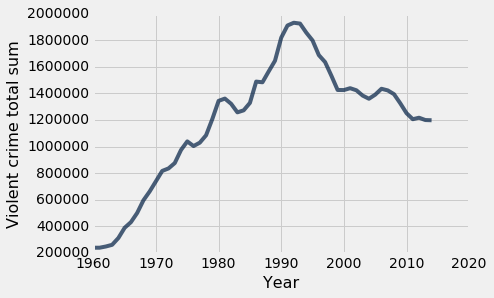

In [42]:
by_year.plot("Year", "Violent crime total sum")

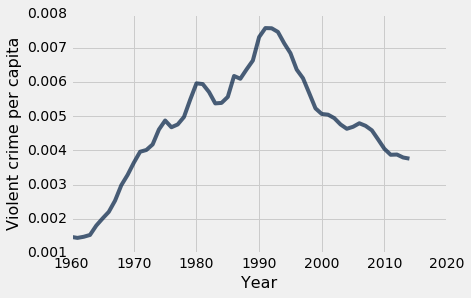

In [41]:
by_year.plot("Year", "Violent crime per capita")

In [29]:
time_use.group("Activity")

Activity,count
Attending class,2
Caring for and helping household children,2
Caring for and helping household members,2
Caring for and helping nonhousehold adults,2
Caring for and helping nonhousehold members,2
Consumer goods purchases,2
Eating and drinking,2
Educational activities,2
Food preparation and cleanup,2
Homework and research,2


In [30]:
time_use.group("Activity", np.mean)

Activity,Gender mean,Type mean,Average hours per day mean,Average percent engaged in the activity mean,Average hours per day for persons who engaged in the activity mean
Attending class,,,0.265,5,5.395
Caring for and helping household children,,,0.33,18.05,1.79
Caring for and helping household members,,,0.43,22.3,1.915
Caring for and helping nonhousehold adults,,,0.075,8.1,0.94
Caring for and helping nonhousehold members,,,0.2,11.7,1.725
Consumer goods purchases,,,0.32,38.65,0.825
Eating and drinking,,,1.18,94.55,1.25
Educational activities,,,0.47,7.75,6.115
Food preparation and cleanup,,,0.47,51.45,0.895
Homework and research,,,0.165,5.7,2.945


In [32]:
nba = Table.read_table("nba_salaries.csv").relabeled("'15-'16 SALARY", "SALARY")
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [34]:
nba.group("TEAM", sum).sort("SALARY sum", descending=True)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Cleveland Cavaliers,,,102.312
Oklahoma City Thunder,,,96.8322
Golden State Warriors,,,94.0851
Memphis Grizzlies,,,93.7964
Washington Wizards,,,90.0475
Houston Rockets,,,85.2858
San Antonio Spurs,,,84.6521
Charlotte Hornets,,,84.1024
Miami Heat,,,81.5287
New Orleans Pelicans,,,80.5146


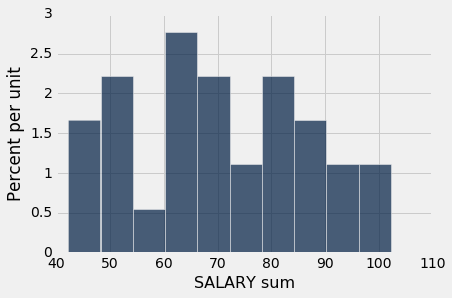

In [35]:
nba.group("TEAM", sum).hist("SALARY sum")

In [36]:
nba.group("POSITION", sum) # Not too useful?

POSITION,PLAYER sum,TEAM sum,SALARY sum
C,,,419.721
PF,,,420.864
PG,,,439.066
SF,,,453.679
SG,,,382.867


In [37]:
nba.group("POSITION", np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


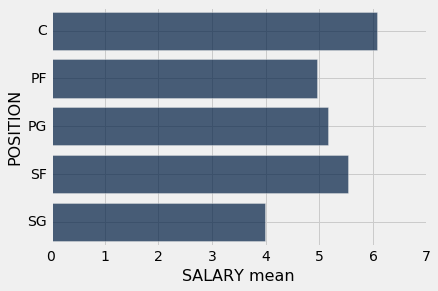

In [39]:
nba.group("POSITION", np.mean).barh("POSITION", "SALARY mean")

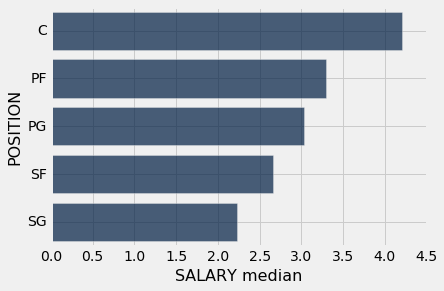

In [40]:
nba.group("POSITION", np.median).barh("POSITION", "SALARY median")

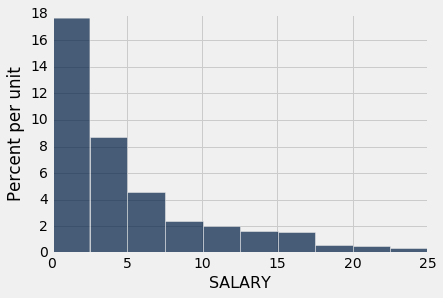

In [42]:
nba.hist("SALARY")

In [43]:
nba.group("POSITION", max) # What do the PLAYER max and TEAM max mean?

POSITION,PLAYER max,TEAM max,SALARY max
C,Zaza Pachulia,Washington Wizards,22.3594
PF,Zach Randolph,Washington Wizards,22.1927
PG,Zach LaVine,Washington Wizards,21.4687
SF,Wilson Chandler,Washington Wizards,25
SG,Zoran Dragic,Washington Wizards,20


In [46]:
nba.select("POSITION", "SALARY").group("POSITION", max)

POSITION,SALARY max
C,22.3594
PF,22.1927
PG,21.4687
SF,25
SG,20
